In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('Airline_customer_satisfaction.csv')
df.head(1)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0


In [40]:
df = df[['Departure Delay in Minutes','Flight Distance']]
df = df.sample(1000)

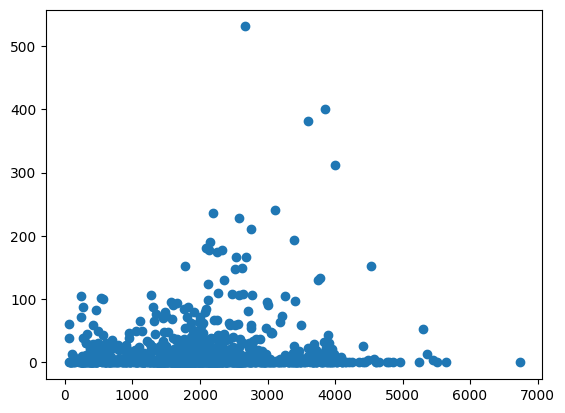

In [41]:
plt.scatter(x=df['Flight Distance'], y = df['Departure Delay in Minutes'])

# Normalization

In [42]:
df['Departure Delay in Minutes NORM'] = (df['Departure Delay in Minutes'] - df['Departure Delay in Minutes'].mean()) / df['Departure Delay in Minutes'].std()

In [43]:
df['Flight Distance NORM'] = (df['Flight Distance'] - df['Flight Distance'].mean()) / df['Flight Distance'].std()

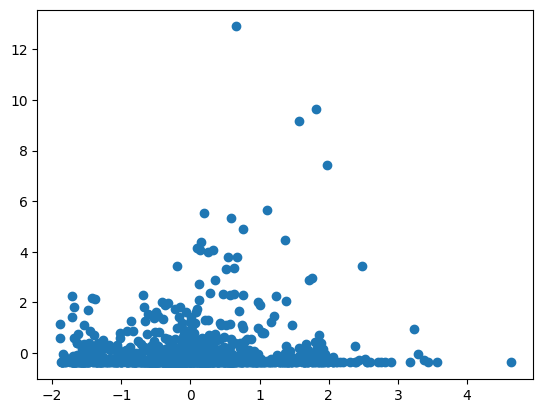

In [44]:
plt.scatter(x=df['Flight Distance NORM'], y = df['Departure Delay in Minutes NORM'])

# Maximum standardization

In [45]:
df['Departure Delay in Minutes MAX'] = df['Departure Delay in Minutes'] / df['Departure Delay in Minutes'].max()

In [46]:
df['Flight Distance MAX'] = df['Flight Distance'] / df['Flight Distance'].max()

Text(0, 0.5, 'Departure Delay in Minutes (Standardized)')

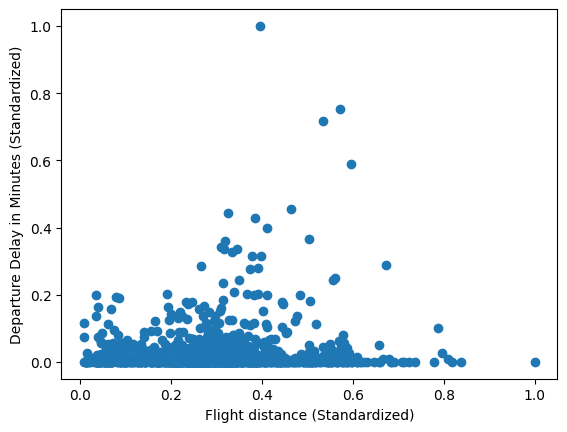

In [47]:
plt.scatter(x=df['Flight Distance MAX'], y = df['Departure Delay in Minutes MAX'])
plt.xlabel('Flight distance (Standardized)')
plt.ylabel('Departure Delay in Minutes (Standardized)')

# Model

In [48]:
df['Flight Distance'].max()

6734

In [49]:
df['Departure Delay in Minutes'].max()

531

## Cost function

In [50]:
def compute_cost(x, y, w, b): 
    # number of training examples
    m = x.shape[0] 
    
    total_cost = 0

    # summation
    h = 0
    
    for i in range(m):
            h += ((((w*(x.iloc[i]))+b)-(y.iloc[i]))**2)

    # finalisation equation
    total_cost = (1/(2*m))*h
    

    return total_cost

## Differentiation and gradient calculation

In [51]:
def compute_gradient(x, y, w, b): 
    # Number of training examples
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    # summation for b
    hb = 0 
    
    for i in range(m):
        hb += (((w*(x.iloc[i]))+b)-(y.iloc[i]))

    # rest of equation
    dj_db = (1/m)*hb
    
    
    # summation for w
    hw = 0
    
    for i in range(m):
        hw += (((w*(x.iloc[i]))+b)-(y.iloc[i]))*(x.iloc[i])

    # rest of equation
    dj_dw = (1/m)*hw  

        
    return dj_dw, dj_db

## Gradient descent

In [52]:
def gradient_descent(x, y, w, b, alpha, num_iters):

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        
        # Update the parameters
        w_temp = w - alpha * dj_dw
        b_temp = b - alpha * dj_db

        w = w_temp
        b = b_temp

        
        # printing the cost every 100 iterations for debugging
        if i % 50 == 0:
            cost = compute_cost(x, y, w, b)
            print(f"Iteration {i}: Cost {cost.round(4)}, w {w.round(4)}, b {b.round(4)}")
    
    return w, b

In [53]:

# Scaled Training data
x = df['Flight Distance MAX']
y = df['Departure Delay in Minutes MAX']

# Initial values for w and b
w = 0
b = 0

# Learning rate
alpha = 0.1

# Number of iterations
num_iters = 500

w, b = gradient_descent(x, y, w, b, alpha, num_iters)

print(f"Optimized w: {w}, Optimized b: {b}")

Iteration 0: Cost 0.0032, w 0.001, b 0.0029
Iteration 50: Cost 0.0028, w 0.0122, b 0.0252
Iteration 100: Cost 0.0028, w 0.0159, b 0.0241
Iteration 150: Cost 0.0028, w 0.0192, b 0.0231
Iteration 200: Cost 0.0028, w 0.0221, b 0.0222
Iteration 250: Cost 0.0028, w 0.0248, b 0.0214
Iteration 300: Cost 0.0028, w 0.0272, b 0.0207
Iteration 350: Cost 0.0028, w 0.0294, b 0.02
Iteration 400: Cost 0.0028, w 0.0313, b 0.0195
Iteration 450: Cost 0.0028, w 0.0331, b 0.0189
Optimized w: 0.03464170262159621, Optimized b: 0.018462200147017757


In [66]:
def predict(input):
    scale_input = input / x.max()
    prediction_output = (scale_input * w) + b
    print(f"The Expected Delay in Departure Time is: {prediction_output.round(1)} minutes")

In [67]:
predict(4000)

The Expected Delay in Departure Time is: 138.6 minutes
